# Multivariate Random Variables

Multivariate random variables extend the concept of a single random variable to include measures of dependence between 2 or more random variables.Note that all results from CH2 are directly applicable here because each component of a multivariate randomv variable is a univariate random variable. This chapter focuses on the extensions required to understand multivariate random variables, including how expectations change, new moments, and additional characterizations of uncertainty. While this chapter discusses discrete and continous multivar random variables in separate sections, note that virtually all results of continous variables can be derived from those for discrete variables by replaicing the sum with an integral.

This CH focuses primarily on bivariate random variables to simplify the math required to understand the key concepts but all definitions and results extend directly to random variables with 3 or more components.

## Discrete Random Variables

Basically multivariate random variables (MRVs) are $n$ dimensional vectors constructed of random variables. A vector of dimension $n$ is an ordered collection of $n$ element, which are called components.

As an example, we may say $X$ is a bivariate random variable composed of $X_1$ and $X_2$. Similarly, its realization ($x$) would have 2 components: $x_1$ and $x_2$. Threated separately, $x_n$ is a realization of $X_n$.

MRVs are like their univariate counterparts in that they can be discrete or continous. Similarly, both types of r vs are denoted with upper case letters like $X$ $Y$ and $Z$.

Note that the PMF / PDF for a bivariate random variable returns the p of that *two* random variables each take a certain value! This means that plotting these functions requires three axes: $X_1, X_2$ and the probability mass/density.  Because the CDF is either the sum of the PMF for all values in the support that are less than or equal to $x$ (for discrete RVs) or the integral of the  PDF (for cont RVs), it requires three axes as well. The PMF/PDF/CDF will therefore be represented as surfaces on three dimensional plots.

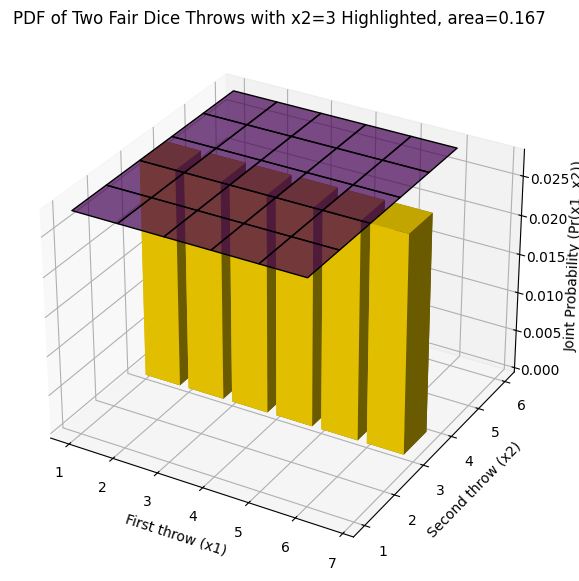

Probability that second dice shows 3: 0.167 (expected 1/6 = 0.1667)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ---- Parameters ----
dice_sides = 6

# Probabilities for each side for each die (can be unfair)
probs_die1 = [1/dice_sides] * dice_sides  # Equal probabilities for fair dice, replace for unfair
probs_die2 = [1/dice_sides] * dice_sides

# Sanity checks to ensure probabilities sum to 1
assert abs(sum(probs_die1) - 1) < 1e-8, "Die 1 probabilities must sum to 1"
assert abs(sum(probs_die2) - 1) < 1e-8, "Die 2 probabilities must sum to 1"

# ---- Enumerate all possible joint outcomes and calculate joint probabilities ----
data = []
pdf = []

for x1 in range(1, dice_sides + 1):
    for x2 in range(1, dice_sides + 1):
        # Joint probability assuming independence: product of individual probabilities
        p_joint = probs_die1[x1 - 1] * probs_die2[x2 - 1]
        data.append((x1, x2))  # Store the outcome pair (x1, x2)
        pdf.append(p_joint)    # Store the corresponding joint probability

# ---- Prepare data for 3D plotting ----
x1, x2 = zip(*data)  # Unpack the outcome pairs into separate lists
y = pdf              # Probabilities for each pair

# Convert lists to numpy arrays for reshaping and plotting
x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(y)

# Reshape into grids of (dice_sides x dice_sides) for surface plotting
x1_grid = x1.reshape((dice_sides, dice_sides))
x2_grid = x2.reshape((dice_sides, dice_sides))
y_grid  = y.reshape((dice_sides, dice_sides))

# ---- Highlight the slice where the second dice shows 3 (x2=3) ----
x2_fixed = 3

# Mask to select grid points where x2 == 3
highlight_mask = (x2_grid == x2_fixed)

# Sum the joint probabilities at x2=3 to get the marginal probability of that event
area_highlight = y_grid[highlight_mask].sum()

# ---- Plot the results ----
fig = plt.figure(figsize=(10, 7))  # Larger figure size for clarity
ax = fig.add_subplot(111, projection='3d')

# Plot the full joint probability distribution as a surface
surf = ax.plot_surface(
    x1_grid,
    x2_grid,
    y_grid,
    cmap='viridis',
    edgecolor='k',
    alpha=0.7  # Slight transparency for the base surface
)

# Highlight x2 = 3 outcomes using vertical bars (for each x1 where x2=3)
for i in range(dice_sides):
    ax.bar3d(
        x1_grid[i, 2],       # x1 at column x2=3 (Python index 2)
        x2_grid[i, 2],       # x2 always 3
        0,                   # base of bar
        0.8,                 # width in x
        0.8,                 # width in y
        y_grid[i, 2],        # height = probability
        color='gold',
        alpha=1.0
    )


# Set axis labels
ax.set_xlabel('First throw (x1)')
ax.set_ylabel('Second throw (x2)')
ax.set_zlabel('Joint Probability (Pr(x1, x2))')

# Add a title including the highlighted area as probability
ax.set_title(f'PDF of Two Fair Dice Throws with x2={x2_fixed} Highlighted, area={area_highlight:.3f}')

# Show the plot
plt.show()

# Output the calculated area for user reference
print(f"Probability that second dice shows {x2_fixed}: {area_highlight:.3f} (expected 1/6 = 0.1667)")

## Probability Matrices

The PMF (as shown above) of a bivariate random variable is a function that returns the probability that $X = x$. To put in terms of the components, this would mean $X_1 = x_1$ and $X_2 = x_2$ $$f_{x_1, x_2}(x_1, x_2) = Pr(X_1 = x_1, X_2 = x_2) = f_x(x) = Pr(X = x)$$

The PMF describes the probability of the outcomes as a function of the coordinates $x_1, x_2$. The probs are always non-negative, less than or equal to 1, and the sum across all possible values in the support of $X_1, X_2$ is 1.

Note how if we make $Pr(x_1|x_2 = 4)$ basically if we sum the yellow column's probability we get back $Pr(x_2 = 3) = 1/6$!

The leading example of a discrete bivar rand var is the trinomial distribution. Both the binomial and the trinomial are special cases of the multinomial distro, which is the distro of $n$ independent trials that can take one of $k$ possible outcomes. So trinomial distribution is basically the distribution of $n$ independent trials where each trial produces one of 3 outcomes. In other words, this distribution generalizes the binomial.

The two components of a trinomial are $X_1, X_2$ which count the number of realizations of outcomes 1 and 2. The realizations of outcome 3 (i.e., $C_3$) is redundant fiven the knowledge of $X_1, X_2$ dince $X_3 = n - X_1 - X_2$. For example, consider the credit quality of a diversified bond portfolio. The $n$ bonds can be classified as investment grade, high yield, or unrated. Tin this case, $X_1$ is investment grade bonds, $X_2$ are the high yield bonds.

**The trinomial PMF has 3 parameters:**

In [15]:
n: int = 1   # The total number of experiments
p_1:float = 0.2 # The probability of observing outcome 1 -> 20%
p_2:float = 0.5 # The probability of observing outcome 2 -> 50%

If these probabilities are mutually exclusive, the probability of outcome 3 is simply $p_3 = 1 - p_1 - p_2$

In [19]:
p_3:float = 1 - p_1 - p_2
print(f" p_1 = {p_1}, p_2 = {p_2},p_3 = {p_3:.1f} | Total pr: {p_1+p_2+p_3}")

 p_1 = 0.2, p_2 = 0.5,p_3 = 0.3 | Total pr: 1.0


The PMF of a trinomial random variable is$$
P(X_1 = x_1, X_2 = x_2, X_3 = x_3) = f_{x_1,x_2,x_3}(x_1,x_2,x_3) = \frac{n!}{x_1! x_2! x_3!} p_1^{x_1} p_2^{x_2} p_3^{x_3}
$$alternatively if $p_3$ is a construct from p_1,2$$
f_{x_1,x_2}(x_1,x_2) = \frac{n!}{x_1! x_2! (n - x_1 - x_2)!} p_1^{x_1} p_2^{x_2} (1-p_1-p_2)^{n-x_1-x_2}$$
Below plot ilustrates the PDF(p_1 = 20%, p_2 = 50%, p_3 = 1 - p_1 - p_2, n = 5)

In [ ]:
n: int = 5 # Number of bonds in the portfoli